In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import numpy as np

In [29]:
path = "LANRES_85_13_RMSP_CEM.csv"

In [3]:
def plot_hist_variaveis(conjunto, dataframe, i=0):
    total_plots = len(conjunto)
    fig = plt.figure(figsize=(30,90))
    fig.subplots_adjust(hspace=0.8, wspace=0.3)

    for var in conjunto:
        ax = fig.add_subplot(total_plots, 2, i+1)

        sns.distplot(x=dataframe[var], ax=ax, color='#435058')
        ax.axvline(x=dataframe[var].mean(), linestyle='--', color='red')
        ax.set_title(var + '. Média = {}'.format(round(dataframe[var].mean(), 2)))
        ax.set_ylabel('')
        ax.set_xlabel('')
        i += 1

def plot_violin_variaveis(conjunto, dataframe,resposta, i=0):
    total_plots = len(conjunto)
    fig = plt.figure(figsize=(30,90))
    fig.subplots_adjust(hspace=0.2, wspace=0.3)

    for var in conjunto:
        ax = fig.add_subplot(total_plots, 2, i+1)

        sns.boxplot(x=dataframe[var], ax=ax, y=dataframe[resposta], color='#435058')
        ax.set_title(var)
        ax.set_ylabel('')
        ax.set_xlabel('')
        plt.xticks(rotation=90)
        #plt.show()
        i += 1

def otimiza_dataframe (dataframe):
    counter_num = 0
    counter_cat = 0
    for col in dataframe.columns:
      if dataframe[col].dtype == 'int64':
          if dataframe[col].max() < 2**7 and dataframe[col].min() > -(2**7):
            dataframe[col] = dataframe[col].astype(np.int8) 
            counter_num += 1 
          elif dataframe[col].max() < 2**15 and dataframe[col].min() > -(2**15):
            dataframe[col] = dataframe[col].astype(np.int16)  
            counter_num += 1 
          elif dataframe[col].max() < 2**31 and dataframe[col].min() > -(2**31):
            dataframe[col] = dataframe[col].astype(np.int32)  
            counter_num += 1 
          elif dataframe[col].max() < 2**63 and dataframe[col].min() > -(2**63):
            dataframe[col] = dataframe[col].astype(np.int64) 
            counter_num += 1    

      elif dataframe[col].dtype == 'float64': 
          if dataframe[col].max() < 2**31 and dataframe[col].min() > -(2**31):
            dataframe[col] = dataframe[col].astype(np.int32)
            counter_num += 1 

      elif dataframe[col].dtype == 'object':
        dataframe[col] = dataframe[col].astype('category')
        counter_cat += 1
    print('Foram otimizadas {} variáveis numéricas e  {} variáveis categóricas'.format(counter_num, counter_cat))

    

In [37]:
df = pd.read_csv(path, delimiter=';', decimal=',')
df_censo_basico = pd.read_csv('DEINFO_DM_CENSODEMOGRAFICOBASICO1_2010.csv', delimiter=';')

In [39]:
df_censo_basico.columns
df_censo_basico.rename({'V001': })

Index(['COD_SETOR', 'COD_GRANDE', 'NOME_GRAND', 'COD_UF', 'NOME_DA_UF',
       'COD_MESO', 'NOME_DA_ME', 'COD_MICRO', 'NOME_DA_MI', 'COD_RM',
       'NOME_DA_RM', 'COD_MUNICI', 'NOME_DO_MU', 'COD_DISTRI', 'NOME_DO_DI',
       'COD_SUBDIS', 'NOME_DO_SU', 'COD_BAIRRO', 'NOME_DO_BA', 'SITUACAO_S',
       'V001', 'V002', 'V003'],
      dtype='object')

In [6]:
df = df.drop(['ID', 'NOME_EMP','CEP','SETOR', 'QUADRA', 'LOTE', 'COD_EMP', 'ENDERECOCO', 'LOGRADOURO', 'TIT_VIA', 'NUM','CEP_4DIG', 'ENGENHEIRO', 'ARQUITETO', 'HOTELARIA', 'INCOPORADO'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16935 entries, 0 to 16934
Data columns (total 69 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TIPO_EMP    16935 non-null  object 
 1   MES_LAN     16935 non-null  object 
 2   ANO_LAN     16935 non-null  int64  
 3   DATA_ENT    16935 non-null  object 
 4   DIST        13234 non-null  object 
 5   SUBPREF     13234 non-null  object 
 6   MUNICIPIO   16935 non-null  object 
 7   TIPO_VIA    16929 non-null  object 
 8   ZONA        16935 non-null  object 
 9   DORM_UNID   16935 non-null  int64  
 10  BANH_UNID   16935 non-null  int64  
 11  GAR_UNID    16935 non-null  int64  
 12  ELEV        16935 non-null  int64  
 13  COB         16935 non-null  int64  
 14  BLOCOS      16935 non-null  int64  
 15  UNIDAND     16935 non-null  int64  
 16  ANDARES     16935 non-null  int64  
 17  AR_UT_UNID  16935 non-null  float64
 18  AR_TT_UNID  16935 non-null  float64
 19  AR_TT_TERR  16935 non-nul

In [6]:
remover = []
for col in df.columns:
    for nome in ['INCORPOR_', 'VENDEDOR', 'CONSTRUT_']:
        remover.append(col) if nome in col and col != ('INCORPOR_A' or 'CONSTRUT_A') else None

#por algum motivo uma variável a mais entrou na lista de remoção, vou remover na mão e depois checo o porquê disso
remover.remove('CONSTRUT_A')
df = df.drop(remover, axis=1)

In [7]:
df[['DIST', 'SUBPREF']] = df[['DIST', 'SUBPREF']].fillna('FORA-SP')

for col in ['RENRESP91', 'PCMEDAU91', 'PCMEDAU00','PCMEDAU10']:
    df[col] = df[col].fillna(df[col].median())

In [8]:
otimiza_dataframe(df)

Foram otimizadas 41 variáveis numéricas e  14 variáveis categóricas


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16935 entries, 0 to 16934
Data columns (total 55 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   TIPO_EMP    16935 non-null  category
 1   MES_LAN     16935 non-null  category
 2   ANO_LAN     16935 non-null  int16   
 3   DATA_ENT    16935 non-null  category
 4   DIST        16935 non-null  category
 5   SUBPREF     16935 non-null  category
 6   MUNICIPIO   16935 non-null  category
 7   TIPO_VIA    16929 non-null  category
 8   ZONA        16935 non-null  category
 9   DORM_UNID   16935 non-null  int8    
 10  BANH_UNID   16935 non-null  int8    
 11  GAR_UNID    16935 non-null  int8    
 12  ELEV        16935 non-null  int8    
 13  COB         16935 non-null  int8    
 14  BLOCOS      16935 non-null  int8    
 15  UNIDAND     16935 non-null  int8    
 16  ANDARES     16935 non-null  int8    
 17  AR_UT_UNID  16935 non-null  float64 
 18  AR_TT_UNID  16935 non-null  float64 
 19  AR_T

In [10]:
v_resposta = "PC_M2_AT_U"
v_numericos = df.select_dtypes(include=["int8", "int16", "int32", "int64", "float"]).columns.to_list()
v_int = df.select_dtypes(include=["int8", "int16", "int32", "int64"]).columns.to_list()
v_float = df.select_dtypes(include="float").columns.to_list()

[v.remove(v_resposta) for v in [v_numericos]]

v_categoricos = ['TIPO_EMP', 'DIST', 'SUBPREF', 'MUNICIPIO', 'TIPO_VIA', 'ZONA', 'SIST_FINAN', 'AGENTE']
#df.select_dtypes(include="category").columns.to_list()
v_datas = ['MES_LAN', 'DATA_ENT']
#v_categoricos.remove('MES_LAN') 
#v_categoricos.remove('DATA_ENT') 

In [11]:
df[v_int].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16935 entries, 0 to 16934
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ANO_LAN     16935 non-null  int16
 1   DORM_UNID   16935 non-null  int8 
 2   BANH_UNID   16935 non-null  int8 
 3   GAR_UNID    16935 non-null  int8 
 4   ELEV        16935 non-null  int8 
 5   COB         16935 non-null  int8 
 6   BLOCOS      16935 non-null  int8 
 7   UNIDAND     16935 non-null  int8 
 8   ANDARES     16935 non-null  int8 
 9   AR_TT_TERR  16935 non-null  int32
 10  TT_UNID     16935 non-null  int16
 11  DORM_EMP    16935 non-null  int16
 12  BANH_EMP    16935 non-null  int16
 13  GAR_EMP     16935 non-null  int16
 14  PC_TT_UN    16935 non-null  int32
 15  VLR_US__CO  16935 non-null  int32
 16  COOPERATIV  16935 non-null  int8 
 17  HOTEL       16935 non-null  int8 
 18  FLAT        16935 non-null  int8 
 19  EXFLAT      16935 non-null  int8 
 20  AP2010      16935 non-null  

In [12]:
df_sp = df.query("MUNICIPIO == 'SAO PAULO'")

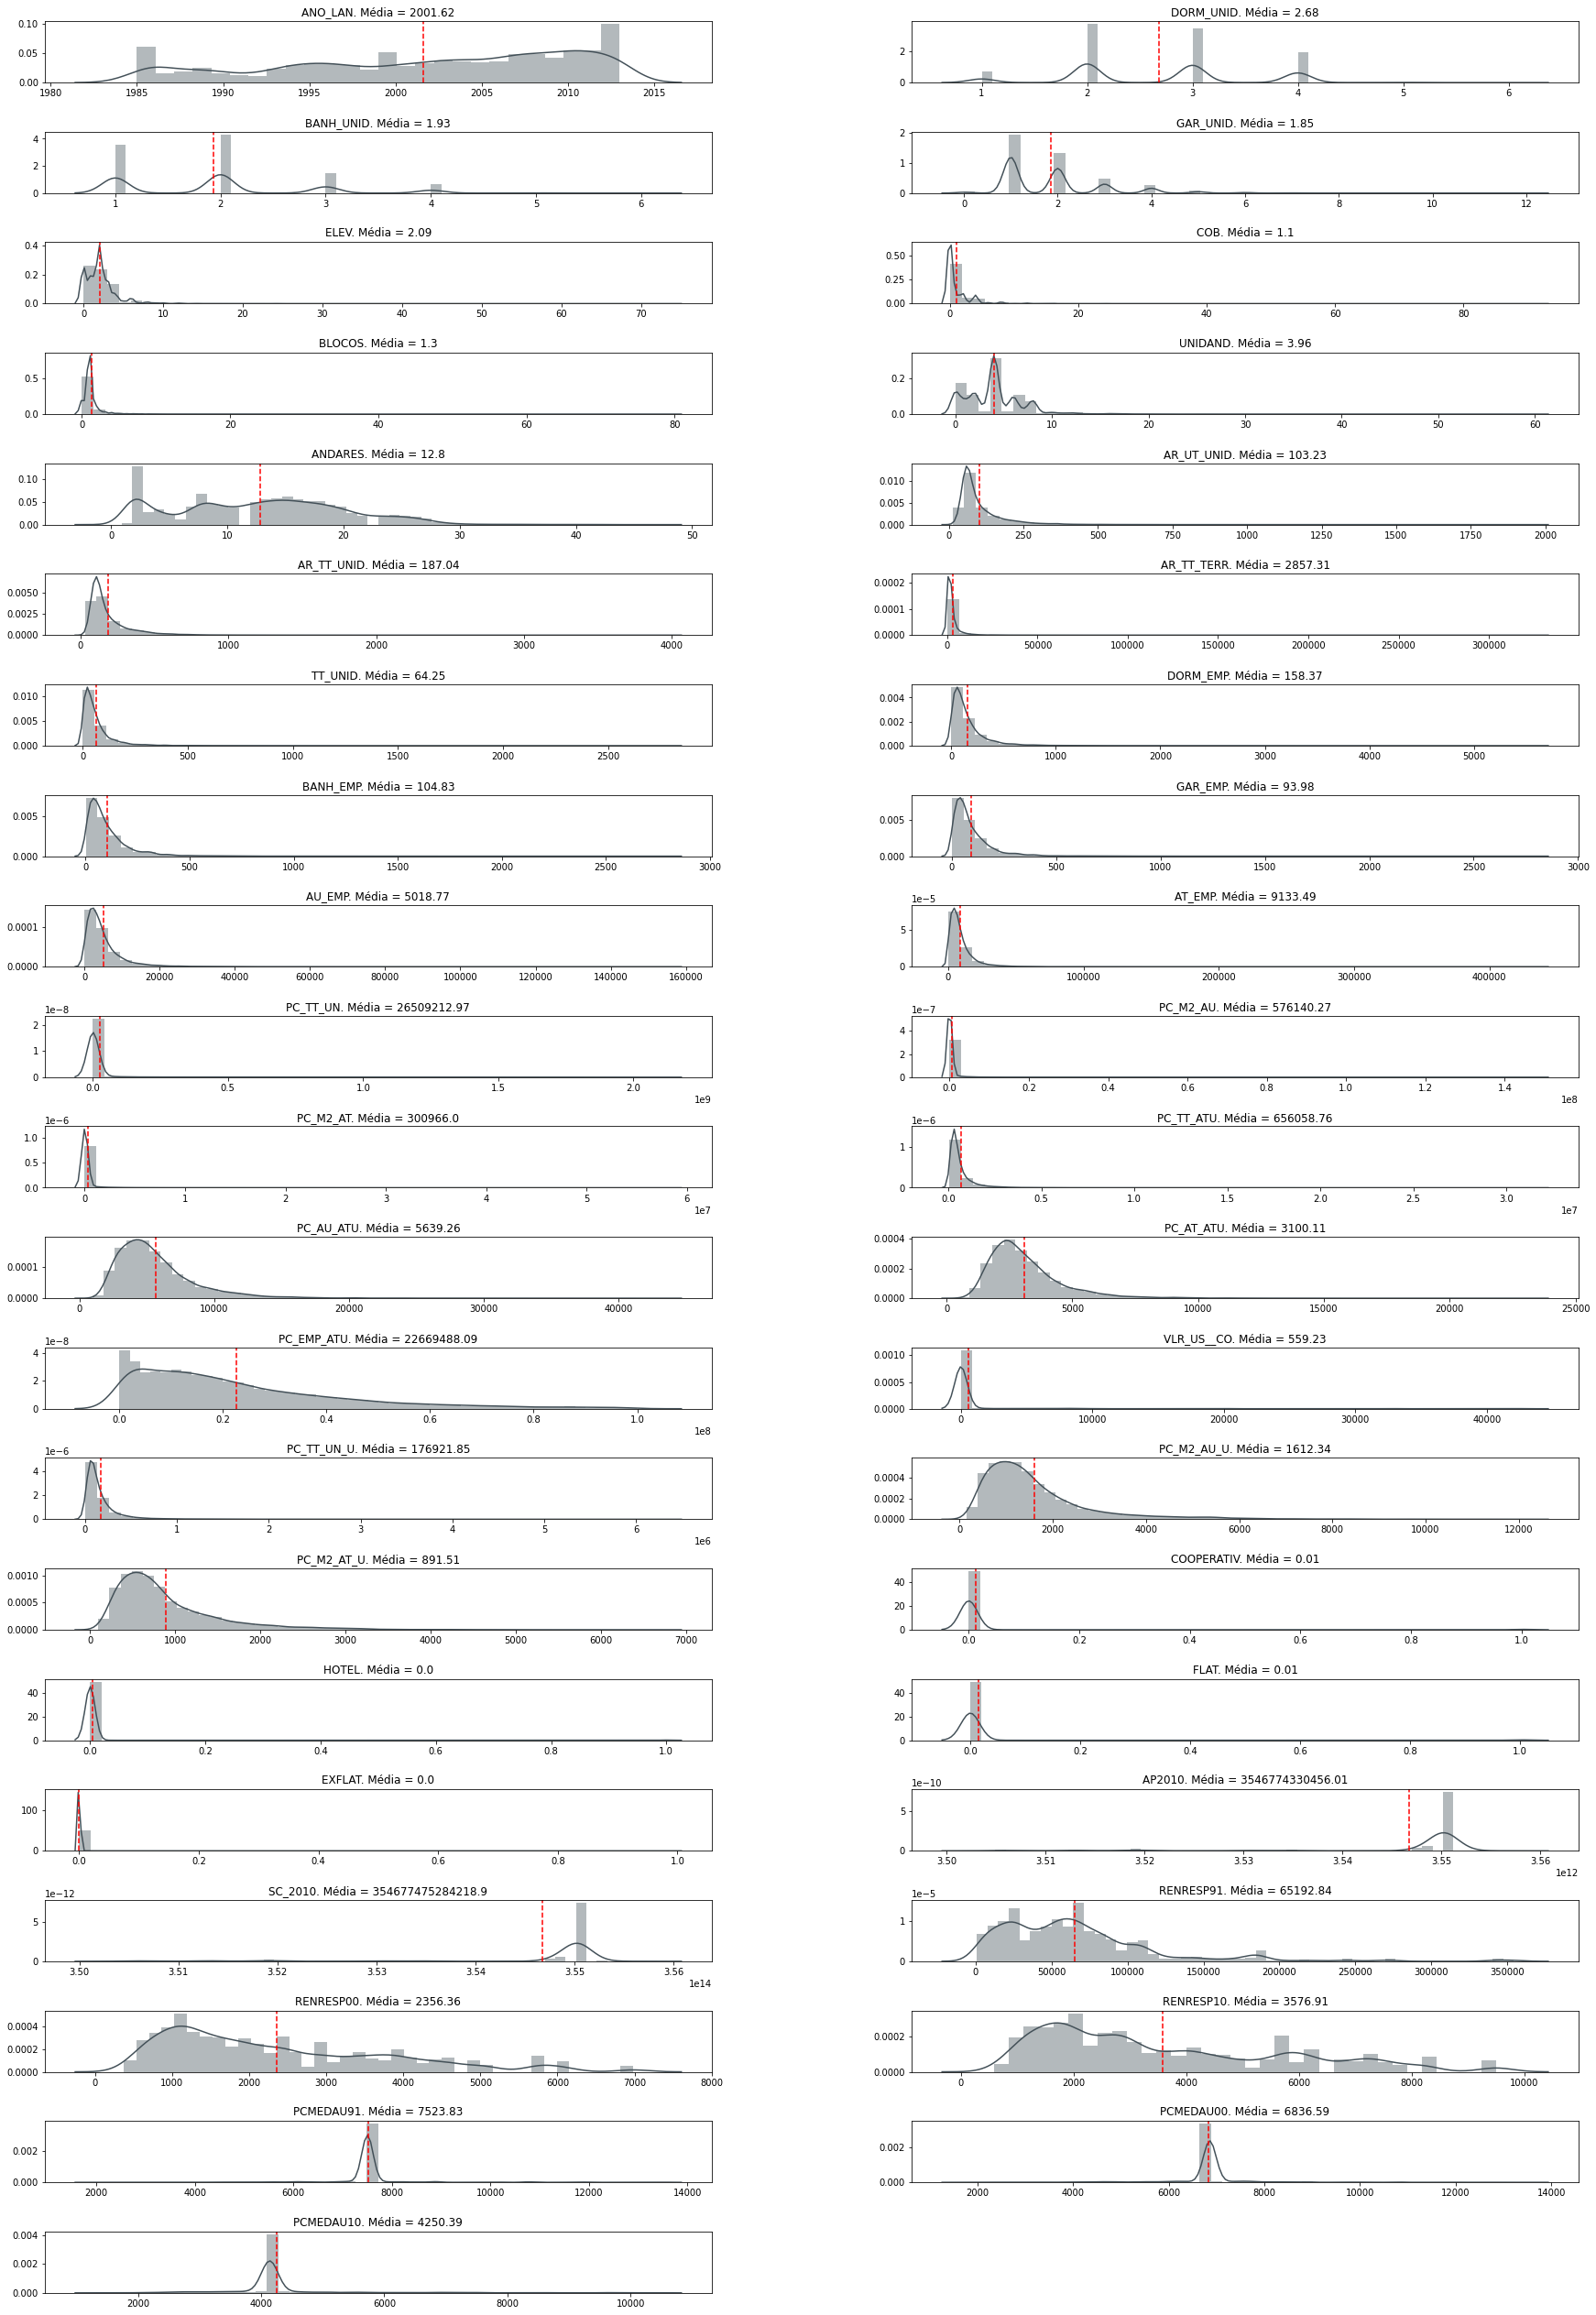

In [21]:
plot_hist_variaveis(v_int, df)

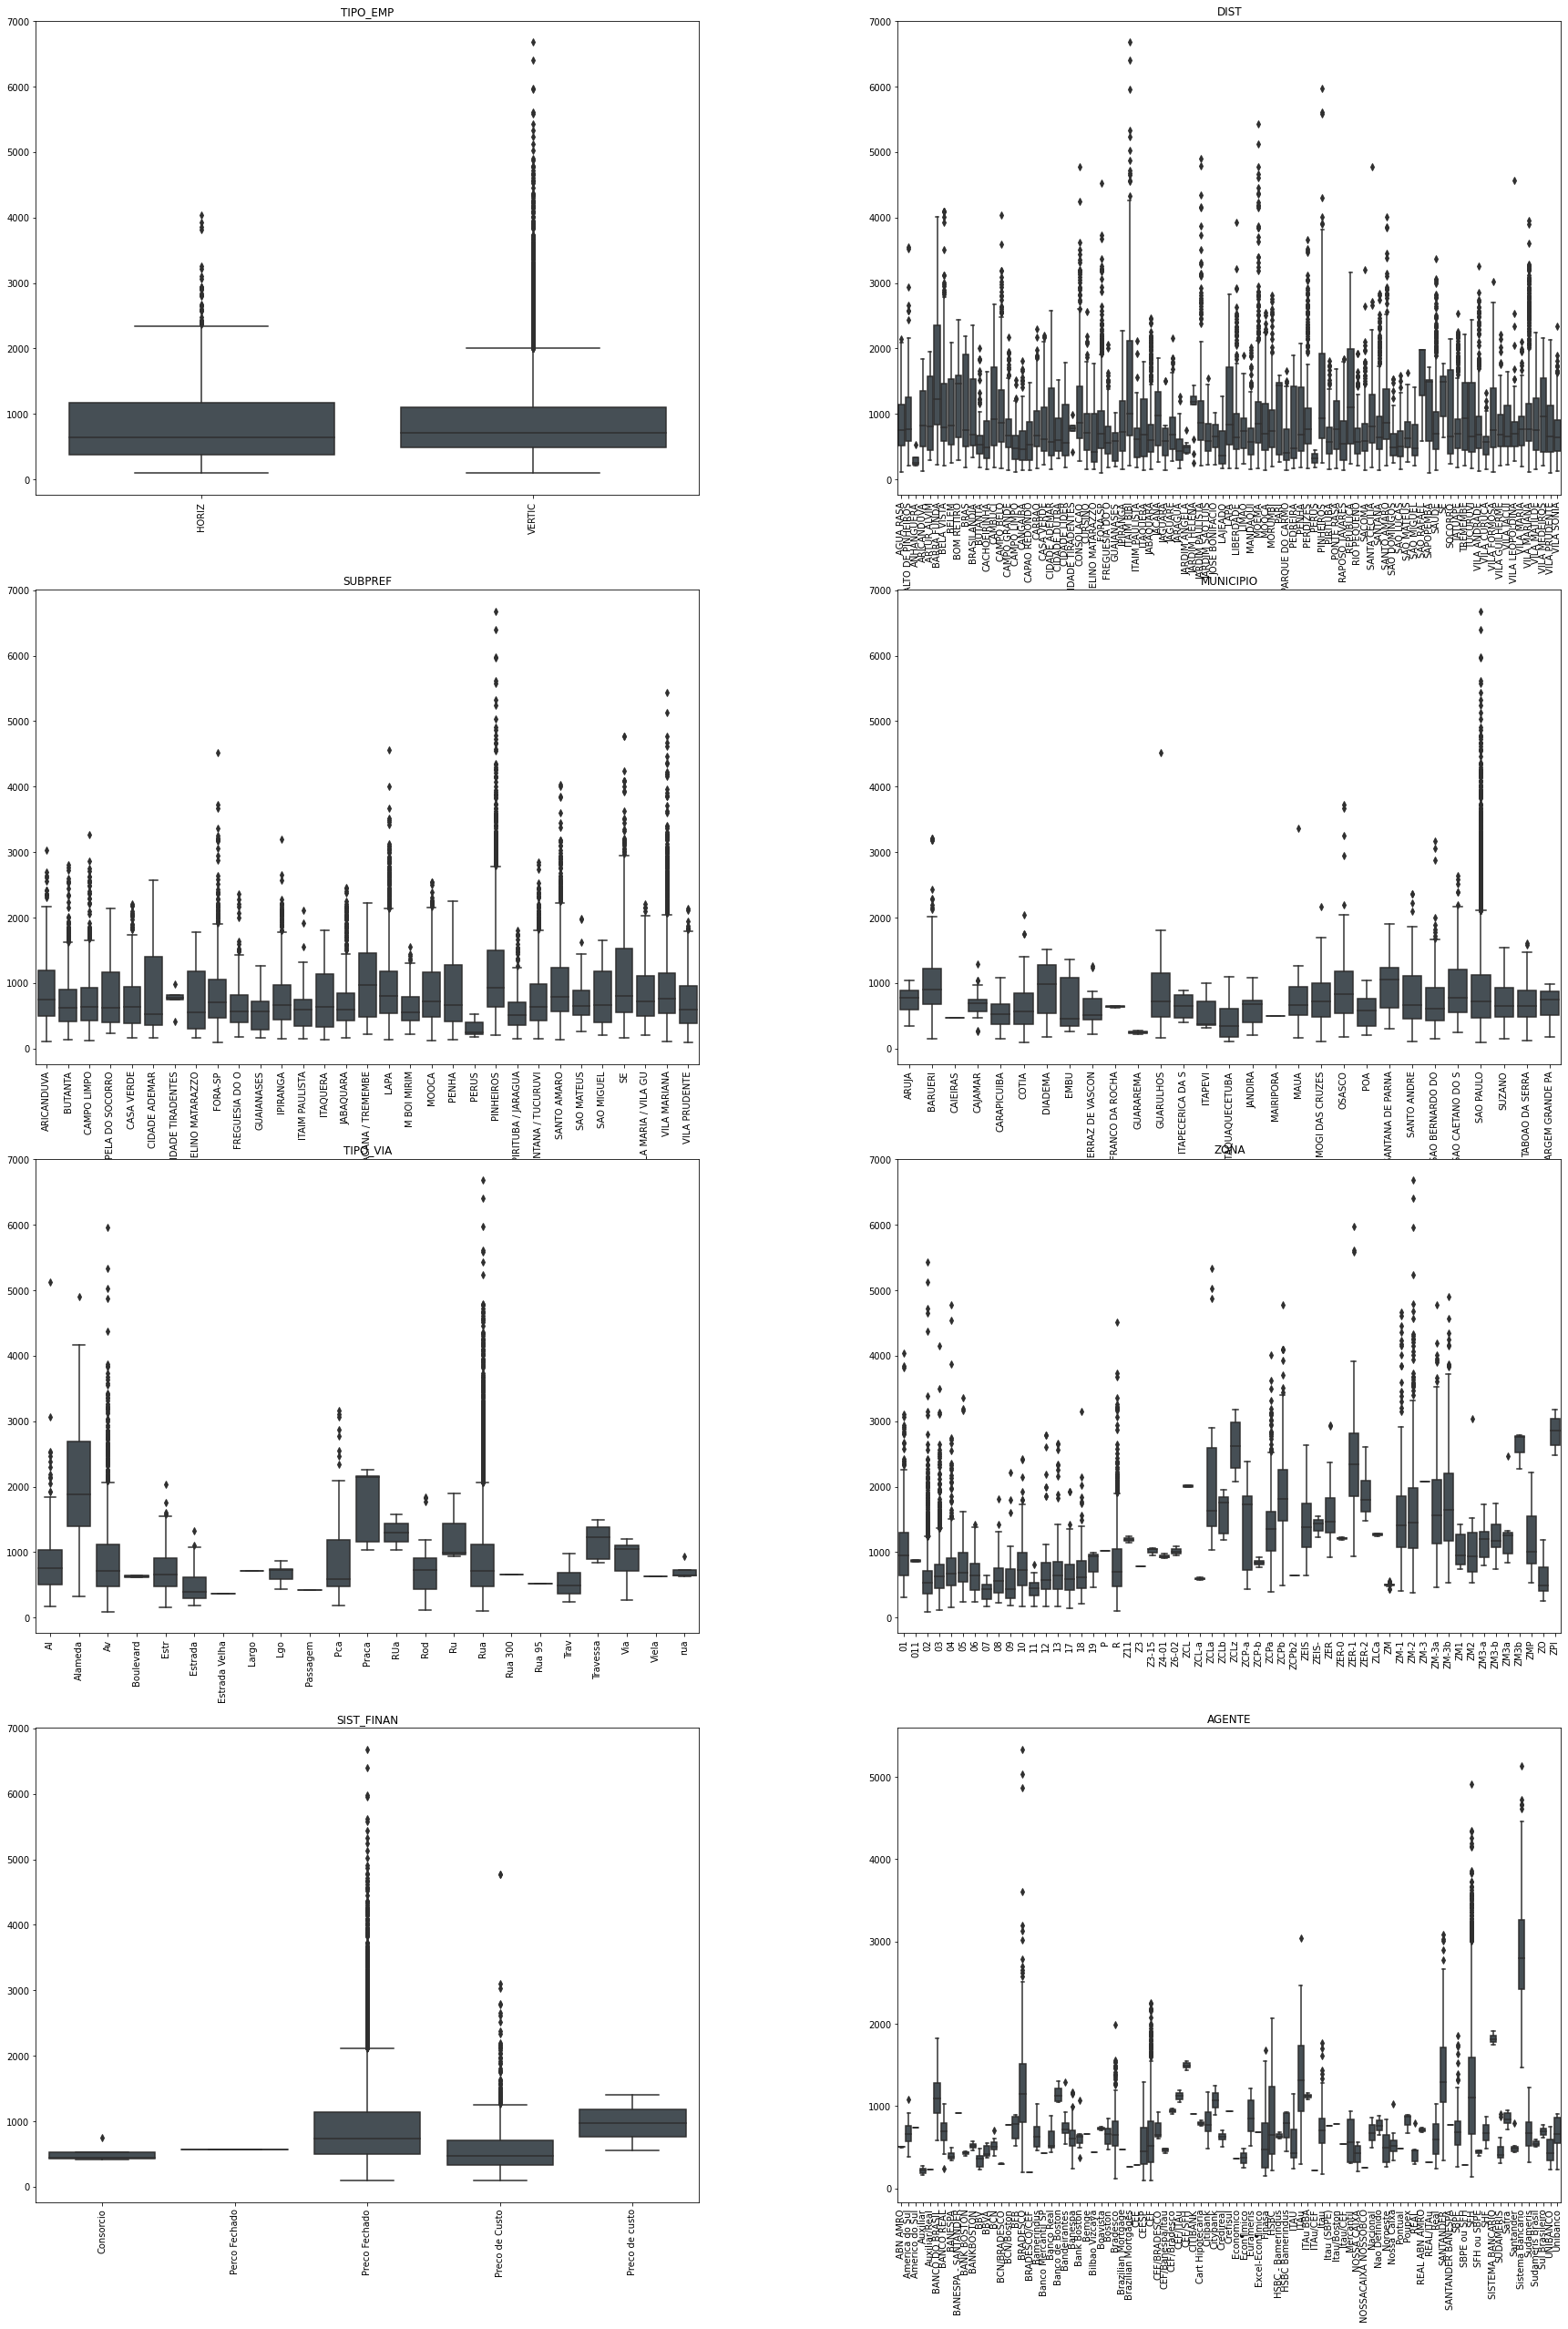

In [15]:
plot_violin_variaveis(dataframe=df, conjunto=v_categoricos, resposta=v_resposta)